In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing important files....
import io
import numpy as np
import pandas as pd
import seaborn as sn
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Dataset/combine dataset.xlsx')

In [ ]:
df

,PATNO,EVENT_ID,NP1SLPN,NP1SLPD,NP1PAIN,NP1URIN,NP1CNST,NP1LTHD,NP1FATG,NP2SPCH,...,NP3PTRML,NP3KTRMR,NP3KTRML,NP3RTARU,NP3RTALU,NP3RTARL,NP3RTALL,NP3RTALJ,NP3RTCON,Status
0,3000.0,BL,1.0,2.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,3000.0,V04,0.0,2.0,0.0,1.0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,3000.0,V06,2.0,1.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3000.0,V08,3.0,2.0,0.0,1.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,3000.0,V10,1.0,1.0,1.0,1.0,1,0,1,0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7141,NaN,NaN,2.0,2.0,2.0,0.0,0,0,2,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7142,NaN,NaN,4.0,2.0,3.0,1.0,1,1,3,3,...,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,3.0,1
7143,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7144,NaN,NaN,0.0,0.0,1.0,0.0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
#feature_names = ['NP1SLPN', 'NP1SLPD','NP1PAIN','NP1URIN','NP1CNST','NP1LTHD','NP1FATG','NP2SPCH','NP2SALV','NP2SWAL','NP2EAT','NP2DRES','NP2HYGN','NP2HWRT','NP2HOBB','NP2TURN','NP2TRMR','NP2RISE','NP2WALK','NP2FREZ','NP3SPCH','NP3FACXP','NP3RIGN','NP3RIGRU','NP3RIGLU','PN3RIGRL','NP3RIGLL','NP3FTAPR','NP3FTAPL','NP3HMOVR','NP3HMOVL','NP3PRSPR','NP3PRSPL','NP3TTAPR','NP3TTAPL','NP3LGAGR','NP3LGAGL','NP3RISNG','NP3GAIT','NP3FRZGT','NP3PSTBL','NP3POSTR','NP3BRADY','NP3PTRMR','NP3PTRML','NP3KTRMR','NP3KTRML','NP3RTARU','NP3RTALU','NP3RTARL','NP3RTALL','NP3RTALJ','NP3RTCON']

#Defining features(X) and labels(Y)....
X = df.drop(['Status','PATNO','EVENT_ID','NP1PAIN','NP1CNST','NP1LTHD','NP1FATG','NP2SPCH','NP2SALV','NP2EAT','NP2HOBB','NP2TURN','NP2RISE','NP3SPCH','NP3FACXP','NP3RIGN','NP3RIGRU','NP3RIGLU','PN3RIGRL','NP3RIGLL','NP3FTAPL','NP3HMOVR','NP3HMOVL','NP3PRSPL','NP3TTAPR','NP3TTAPL','NP3LGAGR','NP3LGAGL','NP3RISNG','NP3GAIT','NP3FRZGT','NP3PSTBL','NP3POSTR','NP3BRADY','NP3PTRMR','NP3PTRML','NP3KTRMR','NP3KTRML','NP3RTALJ','NP3RTCON'],axis =1).values
y = df['Status'].values

In [ ]:
X = pd.DataFrame(X)

In [ ]:
#Checking is any nan value available or not
np.any(np.isnan(X))

True

In [ ]:
#Missing value handle
imputer = SimpleImputer(missing_values = np.NaN, strategy = 'mean')
imputer = imputer.fit(X)
X = imputer.transform(X)
final_dataset = pd.DataFrame(X)
final_dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7141,2.0,2.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7142,4.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,0.0,0.0
7143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Feature scaling
feature_X = StandardScaler().fit_transform(X)

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0)))

Before OverSampling, counts of label '1': 5887
Before OverSampling, counts of label '0': 1259 



In [ ]:
#over sampling
sm = SMOTE(random_state = 2)
X_res, y_res = sm.fit_resample(feature_X, y.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

After OverSampling, the shape of train_X: (11774, 16)
After OverSampling, the shape of train_y: (11774,) 

After OverSampling, counts of label '1': 5887
After OverSampling, counts of label '0': 5887


In [ ]:
#Tr=list()
#Te=list()
#mse=list()
#rmse=list()
#pr=list()
#re=list()
#f=list()

In [ ]:
#Train and test data set split.....
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
train_accs = []
test_accs = []
mse=[]
rmse=[]


for n in range(1, 10):
      model_KNN = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=n, p=2,
                     weights='uniform')
      model_KNN.fit(X_train,y_train)
      y_pred = model_KNN.predict(X_test)
      train_accs.append(model_KNN.score(X_train,y_train))
      test_accs.append(model_KNN.score(X_test,y_test))
      mse.append(metrics.mean_squared_error(y_test, y_pred))
      rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


In [ ]:
train_accs

[0.9828551434569629,
 0.969034289713086,
 0.9737578726382086,
 0.9655353393981806,
 0.9697340797760672,
 0.9629111266620014,
 0.9676347095871238,
 0.9636109167249826,
 0.9658852344296711]

In [ ]:
test_accs

[0.9552447552447553,
 0.9384615384615385,
 0.9552447552447553,
 0.9391608391608391,
 0.9468531468531468,
 0.9377622377622378,
 0.9475524475524476,
 0.9433566433566434,
 0.9482517482517483]

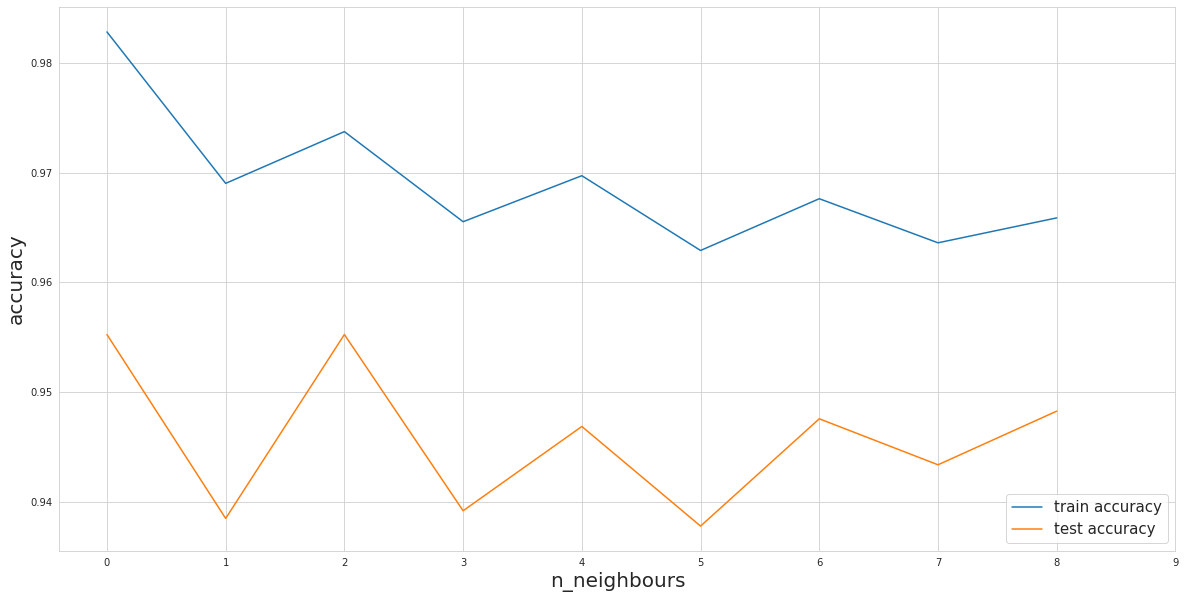

In [ ]:

plt.figure(figsize=(20, 10))
sns.set_style('whitegrid')
plt.plot(train_accs, label='train accuracy')
plt.plot(test_accs, label='test accuracy')


plt.legend(loc='lower right', prop={'size': 15})
plt.xticks(range(0, 10, 1))
plt.xlabel('n_neighbours', size=20)
plt.ylabel('accuracy', size=20)
plt.savefig('accuracy.png')

In [ ]:
#Fitting the defined model
model_KNN.fit(X_train,y_train)

In [ ]:
#Prediction
y_pred = model_KNN.predict(X_test)

In [ ]:
model_KNN.score(X_train,y_train)

In [ ]:
#Model score
model_KNN.score(X_test,y_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
%matplotlib inline
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig('CM.png')

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
#Precision,recall,f1_score,cohen_kappa_score,auc.......
print("Precision,recall,f1 score,cohen kappa score,auc.....")
print(" ")

# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test,  y_pred)
print('ROC AUC: %f' % auc)
print(" ")

In [ ]:
Tr.append(model_KNN.score(X_train,y_train))
Te.append(model_KNN.score(X_test,y_test))
mse.append(metrics.mean_squared_error(y_test, y_pred))
rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
pr.append(precision_score(y_test, y_pred))
re.append(recall_score(y_test,y_pred))
f.append(f1_score(y_test, y_pred))

In [ ]:
print(Tr)
print(Te)
print(mse)
print(rmse)
print(pr)
print(re)
print(f)

In [ ]:
features = range(1,17)
plt.figure(figsize=(10,7))
plt.plot(features, Tr, 'g', label='Training accuraccy')
plt.plot(features, Te, 'b', label='Test accuraccy')
plt.title(' Accuracy vs Feature Number(K-Nearest Neighbour)')
plt.xlabel('Features')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('KNN_accuraccy_vs_features.png')

In [ ]:
features = range(1,17)
plt.figure(figsize=(10,7))
plt.plot(features, mse, 'red', label='Loss(MSE and MAE )')
plt.plot(features,rmse, 'orange', label='Loss(RMSE)')
plt.title(' Model Loss vs Features(K-Nearest Neighbour.)')
plt.xlabel('Features')
plt.ylabel('Model Loss')
plt.legend()
plt.savefig('KNN_loss_vs_features.png')

In [ ]:
import pickle
pickle.dump(model_KNN, open("model_knn_last_1.pkl", "wb"))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'Tremor':75, 'No Tremor':25}
T = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(T, values, color ='maroon',
        width = 0.4)

plt.xlabel(" Tremor...???")
plt.ylabel("Parcentage of having tremor")
plt.title("Parcentage of parkinson  patient having tremor")
plt.savefig('Tremor.png')